# Data Exploration

This notebook will perform exploratory analysis on the european soccer dataset before new feature creation.

Additional exploration of new features is located within the feature creation notebook.

In [200]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First step is to read in the csv files created by the extraction notebook

In [201]:
matches = pd.read_csv('/Users/mtetkosk/Google Drive/Data Science Projects/data/processed/EPL_matches.csv')
print len(matches)
print matches.head()

3040
     id  country_id  league_id     season  stage          date  match_api_id  \
0  1729        1729       1729  2008/2009      1  8/17/08 0:00        489042   
1  1730        1729       1729  2008/2009      1  8/16/08 0:00        489043   
2  1731        1729       1729  2008/2009      1  8/16/08 0:00        489044   
3  1732        1729       1729  2008/2009      1  8/16/08 0:00        489045   
4  1733        1729       1729  2008/2009      1  8/17/08 0:00        489046   

   home_team_api_id  away_team_api_id  home_team_goal  ...      SJA   VCH  \
0             10260             10261               1  ...    10.00  1.28   
1              9825              8659               1  ...    12.00  1.25   
2              8472              8650               0  ...     1.73  5.50   
3              8654              8528               2  ...     3.75  1.90   
4             10252              8456               4  ...     3.75  1.90   

   VCD    VCA   GBH   GBD   GBA   BSH   BSD    BSA 

In [202]:
matches.columns[:11]  # Columns 1 - 10 identify the match and the number of goals scored by each team

Index([u'id', u'country_id', u'league_id', u'season', u'stage', u'date',
       u'match_api_id', u'home_team_api_id', u'away_team_api_id',
       u'home_team_goal', u'away_team_goal'],
      dtype='object')

In [203]:
matches.columns[85:]   # Columns 85 - 115 are betting odds from different websites

Index([u'B365H', u'B365D', u'B365A', u'BWH', u'BWD', u'BWA', u'IWH', u'IWD',
       u'IWA', u'LBH', u'LBD', u'LBA', u'PSH', u'PSD', u'PSA', u'WHH', u'WHD',
       u'WHA', u'SJH', u'SJD', u'SJA', u'VCH', u'VCD', u'VCA', u'GBH', u'GBD',
       u'GBA', u'BSH', u'BSD', u'BSA'],
      dtype='object')

In [204]:
matches.columns[11:55]  # Columns 11-55 are (X,Y) coordinates for players on the pitch - Describing formation

Index([u'home_player_X1', u'home_player_X2', u'home_player_X3',
       u'home_player_X4', u'home_player_X5', u'home_player_X6',
       u'home_player_X7', u'home_player_X8', u'home_player_X9',
       u'home_player_X10', u'home_player_X11', u'away_player_X1',
       u'away_player_X2', u'away_player_X3', u'away_player_X4',
       u'away_player_X5', u'away_player_X6', u'away_player_X7',
       u'away_player_X8', u'away_player_X9', u'away_player_X10',
       u'away_player_X11', u'home_player_Y1', u'home_player_Y2',
       u'home_player_Y3', u'home_player_Y4', u'home_player_Y5',
       u'home_player_Y6', u'home_player_Y7', u'home_player_Y8',
       u'home_player_Y9', u'home_player_Y10', u'home_player_Y11',
       u'away_player_Y1', u'away_player_Y2', u'away_player_Y3',
       u'away_player_Y4', u'away_player_Y5', u'away_player_Y6',
       u'away_player_Y7', u'away_player_Y8', u'away_player_Y9',
       u'away_player_Y10', u'away_player_Y11'],
      dtype='object')

In [205]:
matches.columns[55:85] # Columns 55 - 77 give the player names. Columns 77-84 give some statistics based on the match.

Index([u'home_player_1', u'home_player_2', u'home_player_3', u'home_player_4',
       u'home_player_5', u'home_player_6', u'home_player_7', u'home_player_8',
       u'home_player_9', u'home_player_10', u'home_player_11',
       u'away_player_1', u'away_player_2', u'away_player_3', u'away_player_4',
       u'away_player_5', u'away_player_6', u'away_player_7', u'away_player_8',
       u'away_player_9', u'away_player_10', u'away_player_11', u'goal',
       u'shoton', u'shotoff', u'foulcommit', u'card', u'cross', u'corner',
       u'possession'],
      dtype='object')

Lets remove any variables from matches df that we won't need for this analysis

In [206]:
matches_reduced = matches.copy()
removecols = matches.columns[11:85]
removecols_other = ['country_id','league_id']

In [207]:
for col in matches_reduced.columns:
    if col in removecols or col in removecols_other:
        del matches_reduced[col]  

In [208]:
print matches_reduced.shape   #Reduced from 115 columns to 106 columns

(3040, 39)


In [209]:
matches_reduced.season.value_counts()   #Equal numer of matches per-season

2009/2010    380
2013/2014    380
2010/2011    380
2011/2012    380
2012/2013    380
2014/2015    380
2008/2009    380
2015/2016    380
Name: season, dtype: int64

In [210]:
# What does the 'stage' variable mean?
matches_reduced[matches_reduced.season=='2008/2009'].stage.value_counts()

38    10
10    10
17    10
16    10
15    10
14    10
13    10
12    10
11    10
9     10
37    10
8     10
7     10
6     10
5     10
4     10
3     10
2     10
18    10
19    10
20    10
21    10
36    10
35    10
34    10
33    10
32    10
31    10
30    10
29    10
28    10
27    10
26    10
25    10
24    10
23    10
22    10
1     10
Name: stage, dtype: int64

'Stage' variable must mean 'week' of the season. Each 'stage' consists of 10 matches. This is a way to group matches by date.

In [211]:
matches_reduced.head()

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1729,2008/2009,1,8/17/08 0:00,489042,10260,10261,1,1,1.29,...,10.00,1.28,5.5,12.00,1.30,4.75,10.0,1.29,4.50,11.00
1,1730,2008/2009,1,8/16/08 0:00,489043,9825,8659,1,0,1.20,...,12.00,1.25,6.0,13.00,1.22,5.50,13.0,1.22,5.00,13.00
2,1731,2008/2009,1,8/16/08 0:00,489044,8472,8650,0,1,5.50,...,1.73,5.50,3.8,1.65,5.00,3.40,1.7,4.50,3.40,1.73
3,1732,2008/2009,1,8/16/08 0:00,489045,8654,8528,2,1,1.91,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.25,3.80
4,1733,2008/2009,1,8/17/08 0:00,489046,10252,8456,4,2,1.91,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.30,3.75


Now let's check for missing values

In [212]:
null_dict = {}

for col in matches_reduced.columns[4:]:
    nulls = matches_reduced[col].isnull().sum()
    if nulls > 0:
        null_dict[col] = nulls

null_dict

{'BSA': 1140,
 'BSD': 1140,
 'BSH': 1140,
 'BWA': 1,
 'BWD': 1,
 'BWH': 1,
 'GBA': 1141,
 'GBD': 1141,
 'GBH': 1141,
 'IWA': 2,
 'IWD': 2,
 'IWH': 2,
 'LBA': 1,
 'LBD': 1,
 'LBH': 1,
 'PSA': 1521,
 'PSD': 1521,
 'PSH': 1521,
 'SJA': 720,
 'SJD': 720,
 'SJH': 720}

Many of the betting odds have null values. Let's remove the columns that have excessive nulls.

In [213]:
for key in null_dict.keys():
    if null_dict[key] > 10:
        del matches_reduced[key]
        
matches_reduced.shape

(3040, 27)

In [214]:
matches_reduced.to_csv('/Users/mtetkosk/Google Drive/Data Science Projects/data/processed/EPL_Matches_Reduced.csv',index= False)

In [215]:
team_attributes = pd.read_csv('/Users/mtetkosk/Google Drive/Data Science Projects/data/processed/EPL_team_attributes.csv')
print len(team_attributes)
print team_attributes.head()

204
   id  team_fifa_api_id  team_api_id          date  buildUpPlaySpeed  \
0  71                 1         9825  2/22/10 0:00                66   
1  72                 1         9825  2/22/11 0:00                75   
2  73                 1         9825  2/22/12 0:00                25   
3  74                 1         9825  9/20/13 0:00                30   
4  75                 1         9825  9/19/14 0:00                59   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1                  Fast                   NaN                    Little   
2                  Slow                   NaN                    Little   
3                  Slow                   NaN                    Little   
4              Balanced                  51.0                    Normal   

   buildUpPlayPassing buildUpPlayPassingClass  ...   \
0                  30                   Short  ...    
1 

In [217]:
team_attributes['date']

0      2/22/10 0:00
1      2/22/11 0:00
2      2/22/12 0:00
3      9/20/13 0:00
4      9/19/14 0:00
5      9/10/15 0:00
6      2/22/10 0:00
7      2/22/11 0:00
8      2/22/12 0:00
9      9/20/13 0:00
10     9/19/14 0:00
11     9/10/15 0:00
12     2/22/10 0:00
13     2/22/11 0:00
14     2/22/12 0:00
15     9/20/13 0:00
16     9/19/14 0:00
17     9/10/15 0:00
18     2/22/10 0:00
19     2/22/11 0:00
20     2/22/12 0:00
21     9/20/13 0:00
22     9/19/14 0:00
23     9/10/15 0:00
24     2/22/10 0:00
25     2/22/11 0:00
26     2/22/12 0:00
27     9/20/13 0:00
28     9/19/14 0:00
29     9/10/15 0:00
           ...     
174    2/22/10 0:00
175    2/22/11 0:00
176    2/22/12 0:00
177    9/20/13 0:00
178    9/19/14 0:00
179    9/10/15 0:00
180    2/22/10 0:00
181    2/22/11 0:00
182    2/22/12 0:00
183    9/20/13 0:00
184    9/19/14 0:00
185    9/10/15 0:00
186    2/22/10 0:00
187    2/22/11 0:00
188    2/22/12 0:00
189    9/20/13 0:00
190    9/19/14 0:00
191    9/10/15 0:00
192    2/22/10 0:00


In [75]:
team_attributes.columns

Index([u'id', u'team_fifa_api_id', u'team_api_id', u'date',
       u'buildUpPlaySpeed', u'buildUpPlaySpeedClass', u'buildUpPlayDribbling',
       u'buildUpPlayDribblingClass', u'buildUpPlayPassing',
       u'buildUpPlayPassingClass', u'buildUpPlayPositioningClass',
       u'chanceCreationPassing', u'chanceCreationPassingClass',
       u'chanceCreationCrossing', u'chanceCreationCrossingClass',
       u'chanceCreationShooting', u'chanceCreationShootingClass',
       u'chanceCreationPositioningClass', u'defencePressure',
       u'defencePressureClass', u'defenceAggression',
       u'defenceAggressionClass', u'defenceTeamWidth',
       u'defenceTeamWidthClass', u'defenceDefenderLineClass', u'ID'],
      dtype='object')

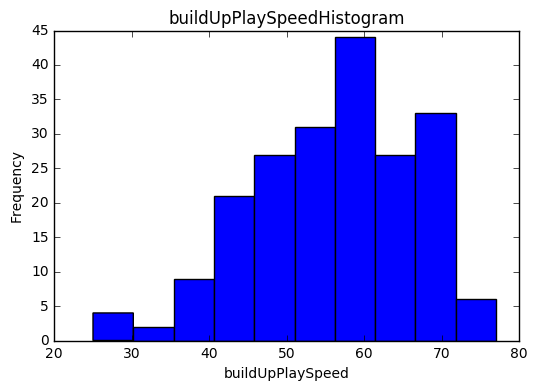

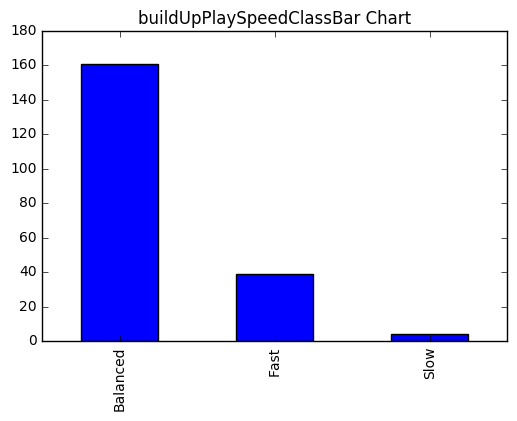

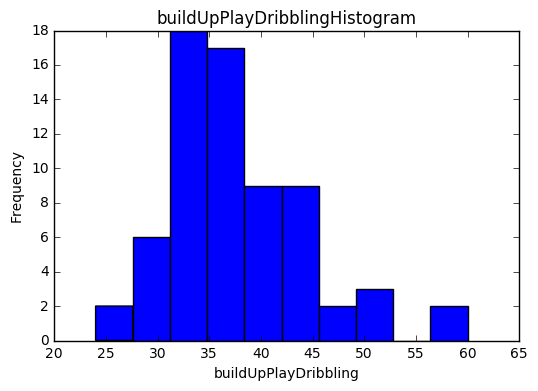

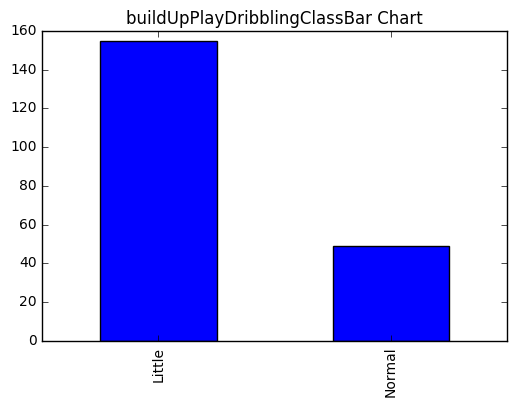

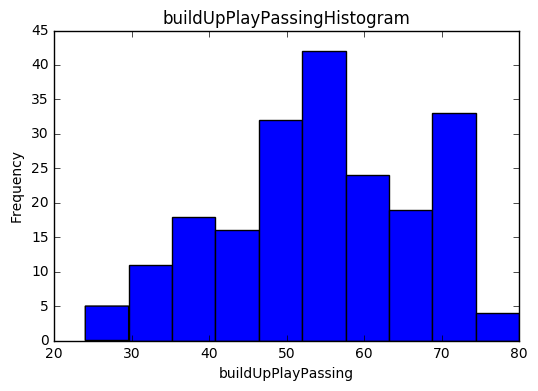

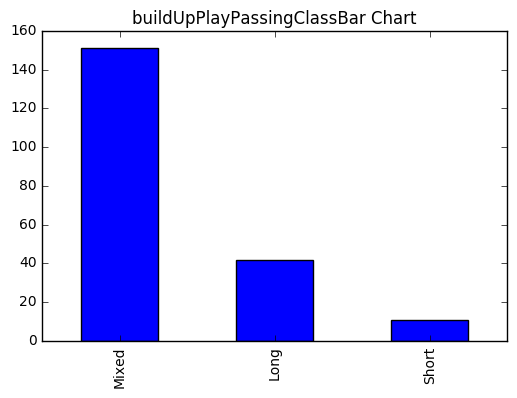

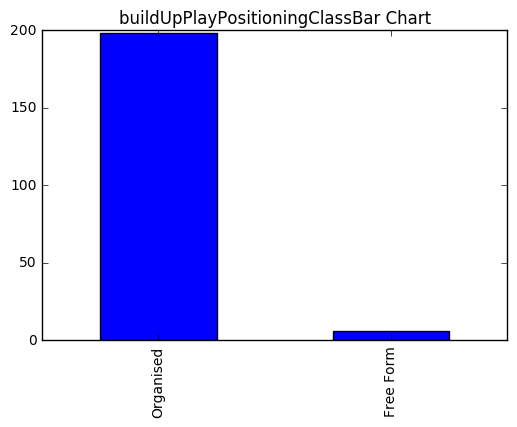

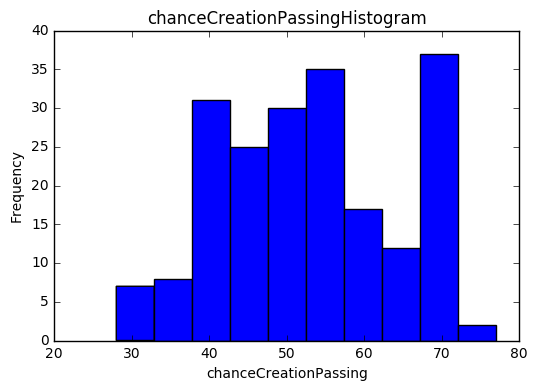

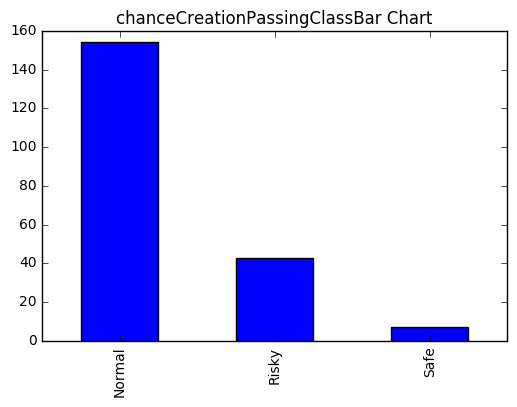

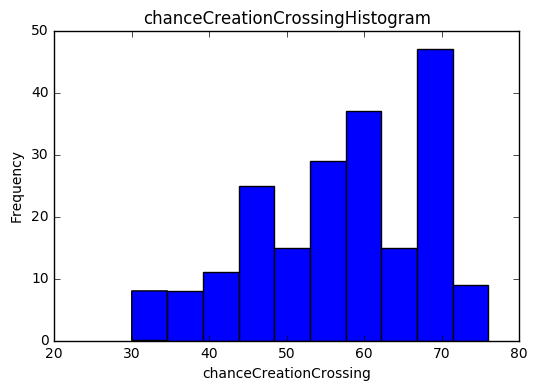

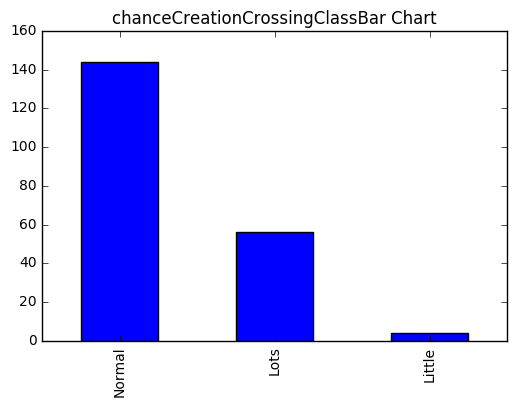

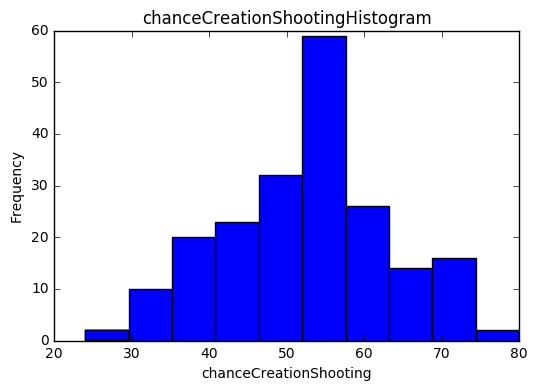

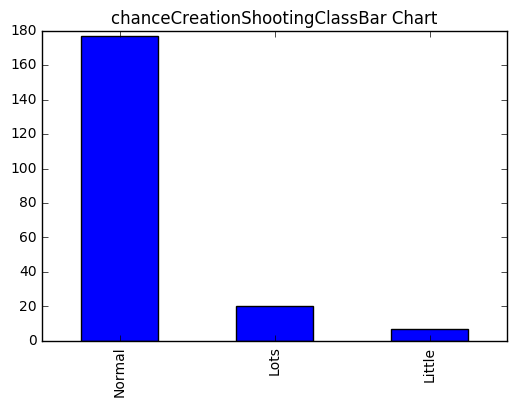

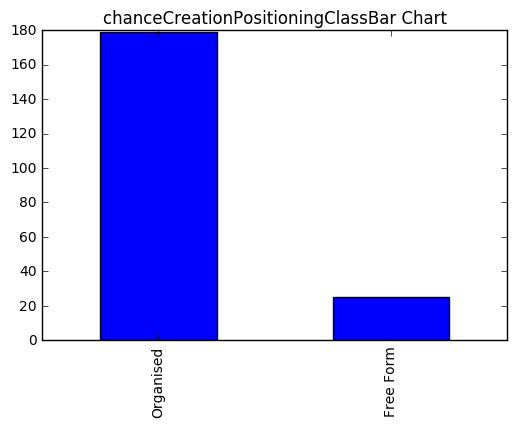

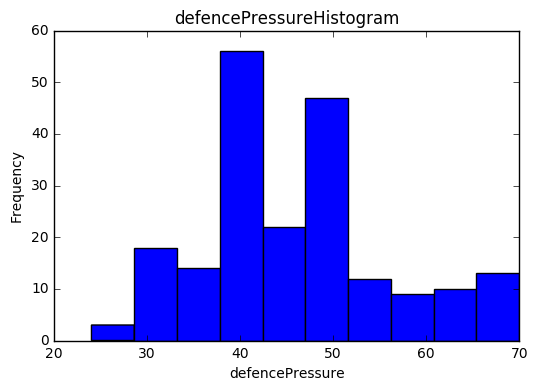

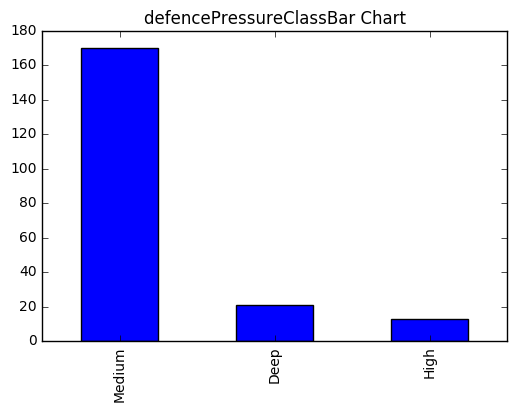

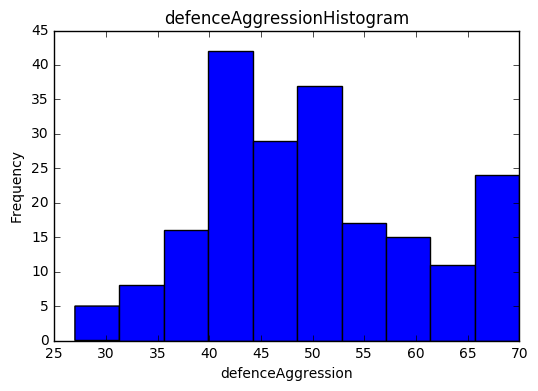

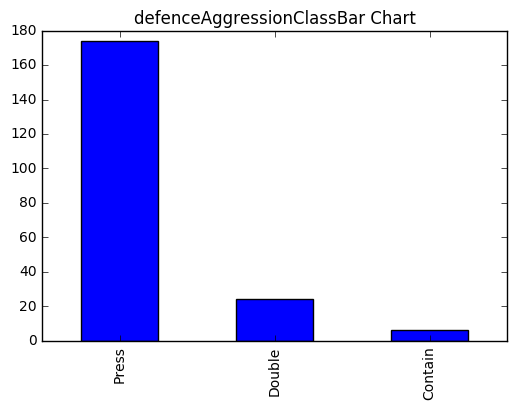

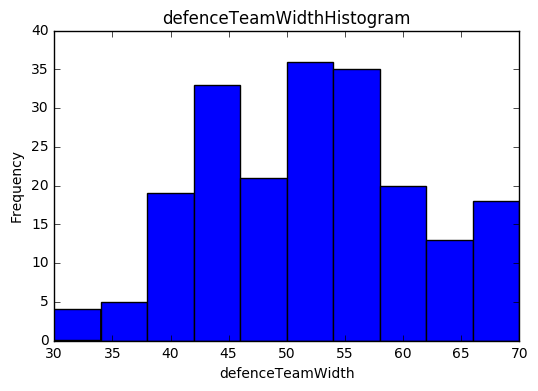

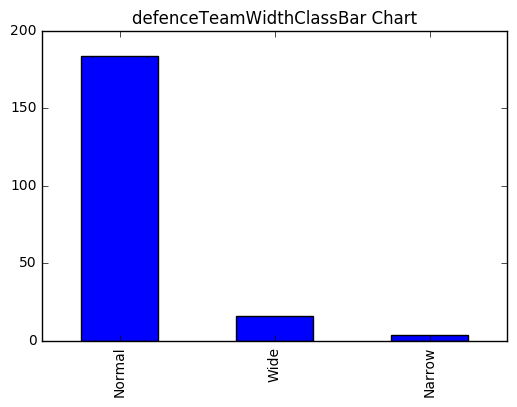

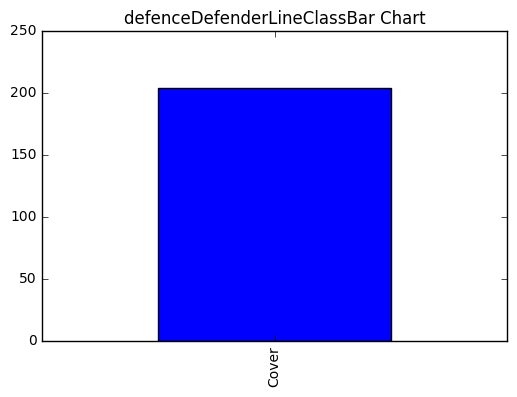

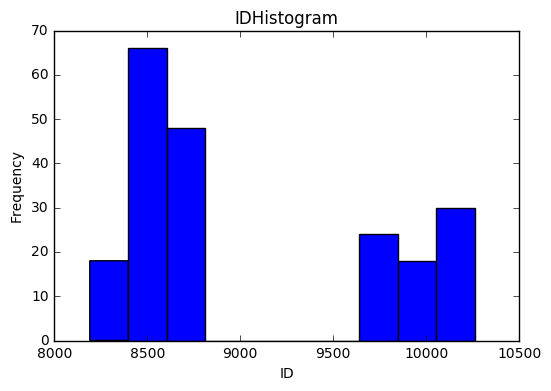

In [97]:
null_dict = {}

for col in team_attributes.columns[4:]:
    nulls = team_attributes[col].isnull().sum()
    if nulls > 0:
        null_dict[col] = nulls
    
    if team_attributes[col].dtype == 'int64' or team_attributes[col].dtype == 'float64':
        team_attributes[col].plot(kind = 'hist')
        plt.xlabel(col)
        plt.title(col + 'Histogram')
        plt.show()
    elif team_attributes[col].dtype == 'object':
        team_attributes[col].value_counts().plot(kind ='bar')  #Build up play passing class value counts totals to 204, no nulls
        plt.title(col + 'Bar Chart')
        plt.show()
        
    
    

In [98]:
null_dict

{'buildUpPlayDribbling': 136}

From 'null_dict' object, only the attribute 'buildUpPlayDribbling' numeric attribute has null values.

In [9]:
teams = pd.read_csv('/Users/mtetkosk/Google Drive/Data Science Projects/data/processed/EPL_teams.csv')
print len(teams)
print teams.head()

34
     id  team_api_id  team_fifa_api_id        team_long_name team_short_name  \
0  3457        10260                11     Manchester United             MUN   
1  3458        10261                13      Newcastle United             NEW   
2  3459         9825                 1               Arsenal             ARS   
3  3460         8659               109  West Bromwich Albion             WBA   
4  3461         8472               106            Sunderland             SUN   

      ID  
0  10260  
1  10261  
2   9825  
3   8659  
4   8472  


In [218]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,ID
0,3457,10260,11,Manchester United,MUN,10260
1,3458,10261,13,Newcastle United,NEW,10261
2,3459,9825,1,Arsenal,ARS,9825
3,3460,8659,109,West Bromwich Albion,WBA,8659
4,3461,8472,106,Sunderland,SUN,8472


## Because players will not be used in this version of the model, we will not explore these attributes.

In [12]:
player_attributes = pd.read_csv('/Users/mtetkosk/Google Drive/Data Science Projects/data/processed/Player_Attributes.csv')
print len(player_attributes)
print player_attributes.head()

183978
   id  player_fifa_api_id  player_api_id           date  overall_rating  \
0   1              218353         505942   2/18/16 0:00            67.0   
1   2              218353         505942  11/19/15 0:00            67.0   
2   3              218353         505942   9/21/15 0:00            62.0   
3   4              218353         505942   3/20/15 0:00            61.0   
4   5              218353         505942   2/22/07 0:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

      ...       vision  penalties  marking  standing_ta

In [13]:
players = pd.read_csv('/Users/mtetkosk/Google Drive/Data Science Projects/data/processed/Players.csv')
print len(players)
print players.head()

11060
   id  player_api_id         player_name  player_fifa_api_id       birthday  \
0   1         505942  Aaron Appindangoye              218353   2/29/92 0:00   
1   2         155782     Aaron Cresswell              189615  12/15/89 0:00   
2   3         162549         Aaron Doran              186170   5/13/91 0:00   
3   4          30572       Aaron Galindo              140161    5/8/82 0:00   
4   5          23780        Aaron Hughes               17725   11/8/79 0:00   

   height  weight  
0  182.88     187  
1  170.18     146  
2  170.18     163  
3  182.88     198  
4  182.88     154  
